In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

Como hay gente voluntariosa, pero que no deja de ser radical, tenemos que limpiar formatos dispares de documentos estatales

In [164]:
# Carta Marina 2015
data2015 = pd.read_csv('../data/raw/escuelas-elecciones-2015-cordoba.csv')

data2015.head()

,Seccion Nro,Seccion Nombre,Circuito Nro,Circuito Nombre,Escuela,Mesas,Desde,Hasta,Electores
0,1,CAPITAL,1,SECCIONAL PRIMERA,CENTRO EDUC.NIVEL MEDIO ADULTO - DEAN FUNES 417,7,1,7,2408
1,1,CAPITAL,1,SECCIONAL PRIMERA,ESC NUESTRA SEÑORA DEL HUERTO - BELGRANO 269,12,8,19,4119
2,1,CAPITAL,1,SECCIONAL PRIMERA,COL NAC DE MONSERRAT - OBISPO TREJO 294,17,20,36,5831
3,1,CAPITAL,1,SECCIONAL PRIMERA,ESC SANTA TERESA DE JESUS - OBISPO TREJO Y SAN...,10,37,46,3430
4,1,CAPITAL,2,SECCIONAL SEGUNDA,ESC JUAN BAUTISTA ALBERDI - GRAL PAZ 486,17,47,63,5693


Separamos `Escuela` en `Escuela`, `direccion` y `barrio`. Lo que es una lastima, porque la muestra de 2017 no tiene `barrio`. O bien hay una confusion entre lo que se nombra como circuito en cada muestra. Lo que tambien seria una lastima.

In [ ]:
data_copy = data2015.copy()
data_copy[['Escuela', 'direccion', 'barrio']] = data_copy.Escuela.str.split(' - ', expand=True)

In [166]:
data_copy = data_copy.rename(columns={
    'Escuela': 'escuela',
    'direccion': 'direccion',
    'Seccion Nro': 'seccion_nro',
    'Seccion Nombre': 'seccion_nombre',
    'Circuito Nro': 'circuito_nro',
    'Circuito Nombre': 'circuito_nombre',
    'Mesas': 'mesas',
    'Desde': 'desde',
    'Hasta': 'hasta',
    'Electores': 'electores', 
    'barrio': 'barrio'
})
data_copy[['escuela', 'direccion', 'seccion_nro', 'seccion_nombre', 'circuito_nro', 'circuito_nombre', 'mesas', 'desde', 'hasta', 'electores']].to_csv('../data/raw/escuelas-elecciones-2015-cordoba-CLEAN.csv', index=False)

In [5]:
data2015 = pd.read_csv('../data/raw/escuelas-elecciones-2015-cordoba-CLEAN.csv')
data2015.sort_values(by='desde').head()

,escuela,direccion,seccion_nro,seccion_nombre,circuito_nro,circuito_nombre,mesas,desde,hasta,electores
0,CENTRO EDUC.NIVEL MEDIO ADULTO,DEAN FUNES 417,1,CAPITAL,1,SECCIONAL PRIMERA,7,1,7,2408
1,ESC NUESTRA SEÑORA DEL HUERTO,BELGRANO 269,1,CAPITAL,1,SECCIONAL PRIMERA,12,8,19,4119
2,COL NAC DE MONSERRAT,OBISPO TREJO 294,1,CAPITAL,1,SECCIONAL PRIMERA,17,20,36,5831
3,ESC SANTA TERESA DE JESUS,OBISPO TREJO Y SANABRIA 160,1,CAPITAL,1,SECCIONAL PRIMERA,10,37,46,3430
4,ESC JUAN BAUTISTA ALBERDI,GRAL PAZ 486,1,CAPITAL,2,SECCIONAL SEGUNDA,17,47,63,5693


Ahi va... Mucho mejor. Ahora veamos 2017.

In [152]:
data2017 = pd.read_csv('../data/raw/escuelas-elecciones-2017-cordoba.csv')
print(len(data2017))
data2017.sort_values(by='desde').head()

1211


,escuela,direccion,seccion_nro,seccion_name,circuito_nro,circuito_name,cant_mesas,desde,hasta,electores
8,CENTRO EDUC.NIVEL MEDIO ADULTO,DEAN FUNES 417,1,CAPITAL,1,SECCIONAL PRIMERA,7,1,7,2401
9,ESC NUESTRA SEÑORA DEL HUERTO,BELGRANO 269,1,CAPITAL,1,SECCIONAL PRIMERA,12,8,19,4116
10,COL NAC DE MONSERRAT,OBISPO TREJO 294,1,CAPITAL,1,SECCIONAL PRIMERA,18,20,37,6158
772,ESC SANTA TERESA DE JESUS,OBISPO TREJO Y SANABRIA 160,1,CAPITAL,1,SECCIONAL PRIMERA,10,38,47,3420
773,ESC JUAN BAUTISTA ALBERDI,GRAL PAZ 486,1,CAPITAL,2,SECCIONAL SEGUNDA,18,48,65,6145


In [ ]:
Esas columnas no son narmales, spanglish es muy malo. 

In [168]:
data_copy = data2017.copy()
data_copy.columns = ['escuela', 'direccion', 'seccion_nro', 'seccion_nombre', 'circuito_nro', 'circuito_nombre', 'mesas', 'desde', 'hasta', 'electores',]         

In [172]:
data_copy.to_csv('../data/raw/escuelas-elecciones-2017-cordoba-CLEAN.csv', index=False)

In [2]:
data2017 = pd.read_csv('../data/raw/escuelas-elecciones-2017-cordoba-CLEAN.csv')
data2017.head()

,escuela,direccion,seccion_nro,seccion_nombre,circuito_nro,circuito_nombre,mesas,desde,hasta,electores
0,INST EDUC NTRA SEÑORA,INCA MANCO 3450,1,CAPITAL,4B,VILLA REVOL,19,246,264,6536
1,ESC EJERCITO ARGENTINO,CASTAÑARES 470,1,CAPITAL,12F,JOSE HERNANDEZ,8,2385,2392,2744
2,ESC PANAMERICANA,SOTO 919,1,CAPITAL,5,ALTAMIRA,9,349,357,3058
3,ESC RABINDRANAT TAGORE,OCARINA 1613,1,CAPITAL,8,LA FLORESTA NORTE,3,897,899,784
4,COL NICOLAS BERROTARAN,ELIAS YOFRE 1095,1,CAPITAL,4B,VILLA REVOL,11,274,284,3775


In [3]:
results = pd.read_csv('../data/processed/resultados-secciones-2015.csv', index_col=0)
print(len(results))
results.head()

8408


,nombre_circuito,numero_mesa,votos_fpv,votos_cambiemos,votos_blancos,votos_nulos,votos_recurridos,total
0,158B,5513,80,134,0,3,0,217
1,158B,5514,54,155,1,5,0,215
2,158B,5515,75,140,4,3,0,222
3,158B,5516,54,154,2,8,0,218
4,147B,5089,72,156,2,3,0,233


Tratemos de integrar los datos de la carta marina con los resultados.
Vamos a iterar sobre los resultados por mesa. Nos fijamos si la mesa esta en el rango de mesas que tiene cada escuela y sumamos los resultados.

In [18]:
completo = data2015.copy()
store = {}
columns = ['votos_fpv', 'votos_cambiemos', 'votos_blancos', 'votos_nulos', 'votos_recurridos', 'total']
def merge_results(df):
    for x in df.itertuples():

        value = x.numero_mesa
        circuito = x.nombre_circuito
        condition = ((completo.desde<=value) & (completo.hasta>=value))
        index = completo[completo.circuito_nro==circuito][condition]
        columns = ['votos_fpv', 'votos_cambiemos', 'votos_blancos', 'votos_nulos', 'votos_recurridos', 'total']
        subset = x[columns]
        completo[index][columns] += subset
        return completo
    

nombre_circuito
1     Axes(0.125,0.125;0.775x0.755)
10    Axes(0.125,0.125;0.775x0.755)
11    Axes(0.125,0.125;0.775x0.755)
12    Axes(0.125,0.125;0.775x0.755)
13    Axes(0.125,0.125;0.775x0.755)
14    Axes(0.125,0.125;0.775x0.755)
2     Axes(0.125,0.125;0.775x0.755)
3     Axes(0.125,0.125;0.775x0.755)
4     Axes(0.125,0.125;0.775x0.755)
5     Axes(0.125,0.125;0.775x0.755)
6     Axes(0.125,0.125;0.775x0.755)
7     Axes(0.125,0.125;0.775x0.755)
8     Axes(0.125,0.125;0.775x0.755)
9     Axes(0.125,0.125;0.775x0.755)
dtype: object

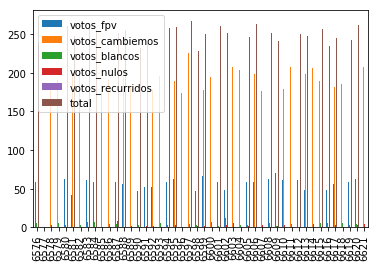

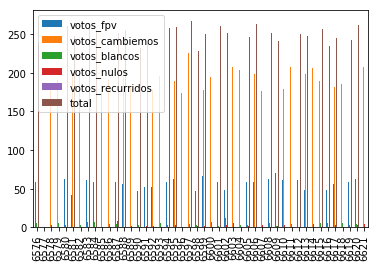

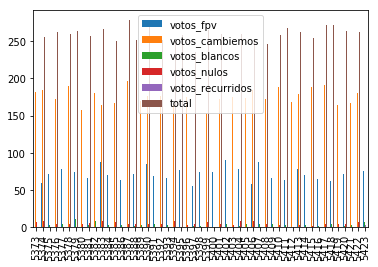

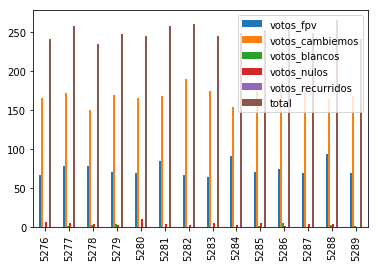

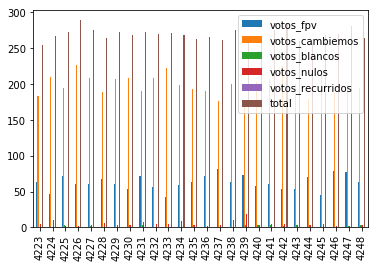

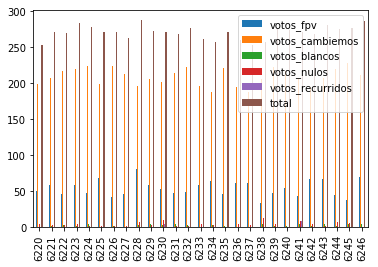

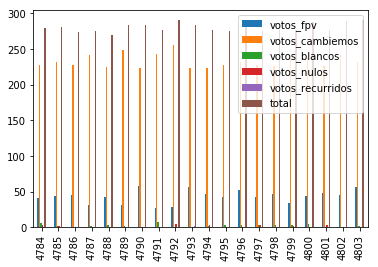

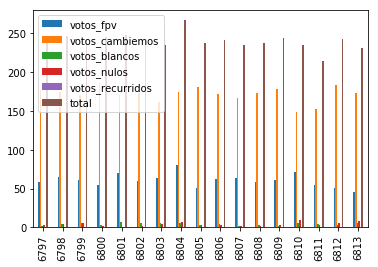

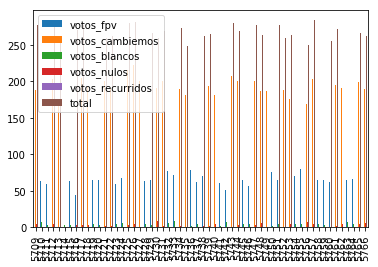

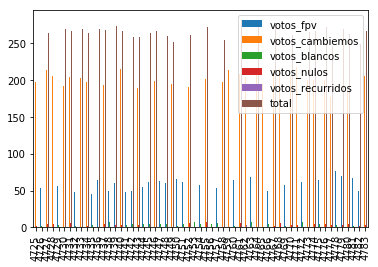

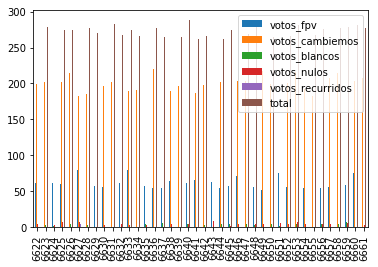

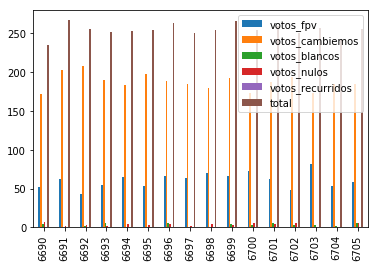

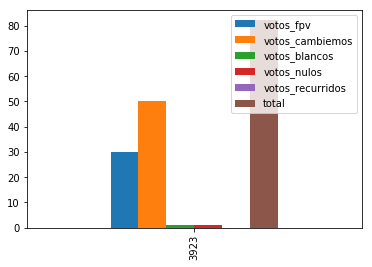

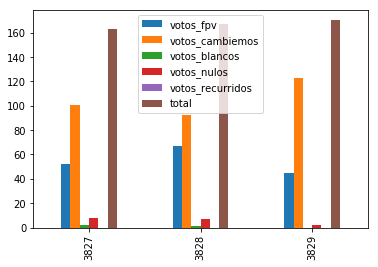

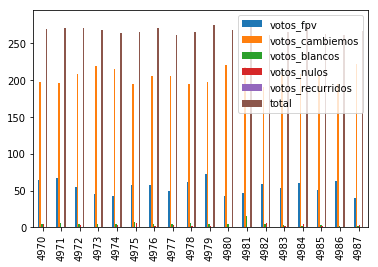

In [20]:
mask = results.nombre_circuito.isin(data2015[data2015.seccion_nro==1].circuito_nro.unique())
results[mask].groupby('nombre_circuito')[columns].plot.bar()